In [1]:
import numpy as np
import pandas as pd
import random
import math
import operator

df = pd.read_excel("D:/Dataset/Example_DT_conti.xlsx",header=None)
df.head()
# df.columns

,0,1,2
0,51,35,0
1,24,81,0
2,72,24,0
3,27,32,0
4,41,54,0


In [3]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [4]:

import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [5]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

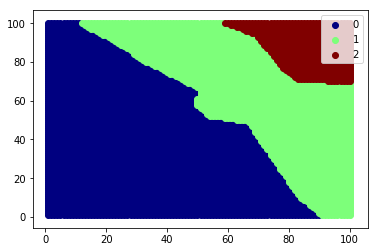

In [7]:
data = pd.DataFrame([])
for i in range (1,101):
    for j in range(1,101):
        
        index=[]
        distance=[]
        for d in range(len(df)):
            a=np.array((df.at[d,0],df.at[d,1]))
#             print(a)
            b=np.array((i,j))
#             print(a,b)
        
            e = np.linalg.norm(a - b) 
#             print(e)
#             ec= euclideanDistance(a,b,2)
#             print(ec)
            index.append(d)
#             print(err)
            distance.append(e)
#         neighbors = getNeighbors(trainingSet, testSet[x], k)
#         result = getResponse(neighbors)
#         print(result)
        my_dict = dict(zip(index, distance))
        sorted(my_dict.items(), key=operator.itemgetter(1,0))
        label_list=[]
        for k,v in sorted(my_dict.items(), key=operator.itemgetter(1))[:5]:
#             print(k)
            label_list.append(df.at[k,2])
#         print(label_list)
        
        a=label_list.count(0)
        b=label_list.count(1)
        c=label_list.count(2)
        mx=max(a,b,c)
        if mx==a:
            label=0
        if mx==b:
            label=1
        if mx==c:
            label=2
       
#         print(label)
        data = data.append(pd.DataFrame({'A': i, 'B': j,'Class':label}, index=[0]), ignore_index=True)
data.head()        


import matplotlib.pyplot as plt
x=data['A'].values
y=data['B'].values
classes=data['Class'].values
unique = np.unique(classes)
colors = [plt.cm.jet(i/float(len(unique)-1)) for i in range(len(unique))]
for i, u in enumerate(unique):
    xi = [x[j] for j  in range(len(x)) if classes[j] == u]
    yi = [y[j] for j  in range(len(x)) if classes[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.show()